# EDA and Plotting Time Series

This notebook explains **what is a time series** and how to:
* Two structures that store time series: ```ts``` and ```tsibble```
* Do the basic EDA of time series
* Plot the time series

in R using basic R and ```fpp3``` is meta-package.

This notebook is made for **beginners** in R language.

## Time Series

Any metric that is measured over regular time intervals makes a Time Series.

Some examples include:
* Maximum temperature of day in London
* Google daily closing stock prices
* Hourly energy consumption in Paris

We can define a observed time series as a series of data points indexed in time order:
$$ \{x_t | t \in \{1, 2, ..., T\} \} = (x_0, x_1, x_2, ..., x_t, x_{t+1}, ...)$$,

where $x_t$ is an observation at the time step $t$.

The purpose of time series analysis is to
1. Understand or model the stochastic mechanisms that gives rise to an observed series $\{x_t | t \in \{1, 2, ..., T\}\}$
2. Predict or forecast the future values $\{x_{T+1}, x_{T+2}, ...\}$ of a series based on the history of that series.

## ```ts``` object

```ts``` is a base R time series that have fixed time intervales.

Some popular datasets that come bult into base R are:
* **AirPassengers**: Monthly airline passengers (1949-1960)
* **UKDriverDeaths**: Monthly UK road accidents (1969-1984)
* **Nile**: Annual river flow of the Nile (1871-1970)
* **JohnsonJohnson**: Quarterly earnings per Johnson & Johnson share.

In [10]:
class(AirPassengers)

[1] "ts"

In [11]:
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


### EDA

In [12]:
# show the start/end dates of the time serie data
start(AirPassengers)

[1] 1949    1

In [13]:
end(AirPassengers)

[1] 1960   12

In [14]:
# show summary of air passengers value
summary(AirPassengers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 

### Time series plot

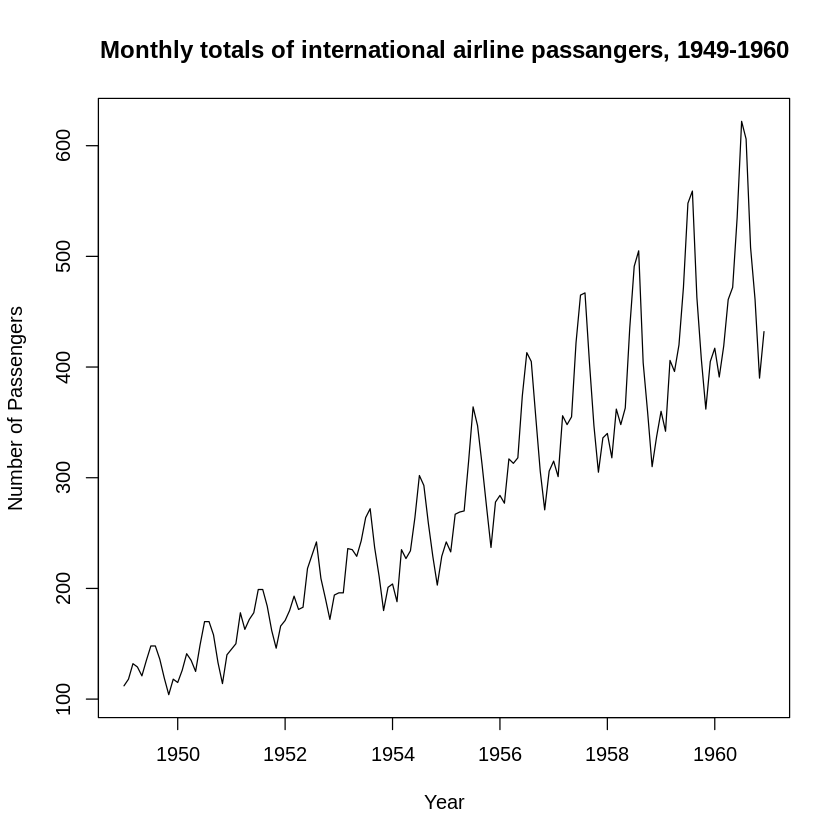

In [15]:
ts.plot(AirPassengers,
        xlab = "Year",
        ylab = "Number of Passengers",
        main = "Monthly totals of international airline passangers, 1949-1960")

We can spot **upword trend** and **seasonality** in the data.

### Data aggregation

AirPassengers is monthly data (frequency = 12).

In [23]:
# show the data frequency
frequency(AirPassengers)

[1] 12

```aggregate()``` function groups the series by year because the series has a yearly cycle. We use it to plot the time series line plot where:
* **x-axis** is year (1949-1960)
* **y-axis** is median number of passangers in each year

Each point at the line is connected to one year.



In [29]:
AirPassengers_median <- aggregate(AirPassengers, FUN = median)
AirPassengers_median

A Time Series:
 [1] 125.0 137.5 169.0 192.0 232.0 231.5 272.0 315.0 351.5 360.5 406.5 461.0

In [34]:
frequency(AirPassengers_median)

[1] 1

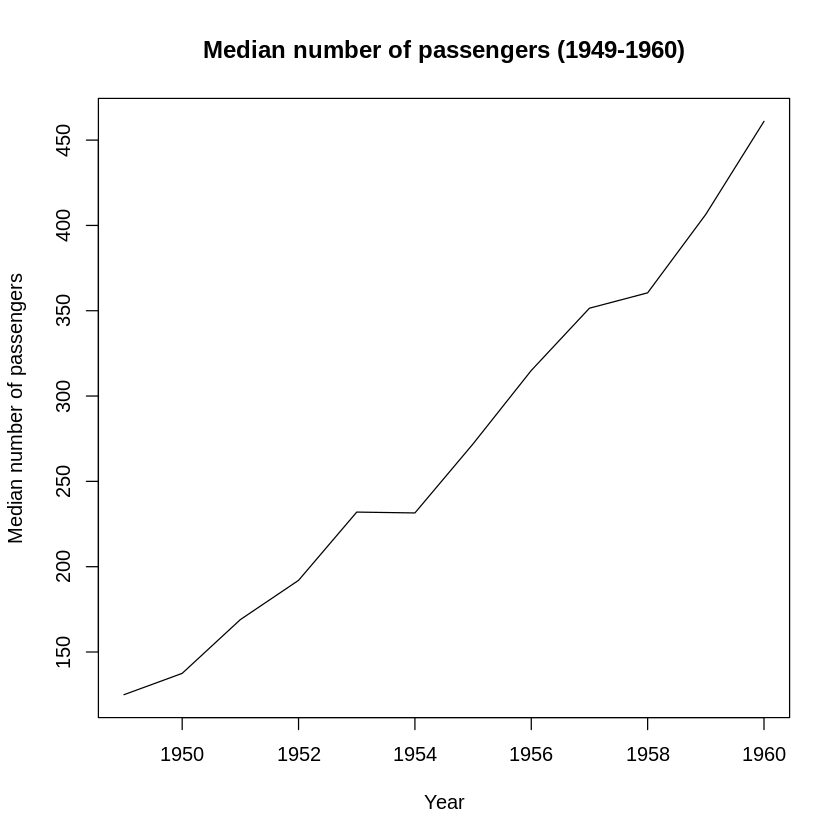

In [36]:
ts.plot(AirPassengers_median,
        xlab = "Year",
        ylab = "Median number of passengers",
        main = "Median number of passengers (1949-1960)"
  )

The plot of yearly aggregated data shows an **upward trend** in data.

### Monthly Box Plot

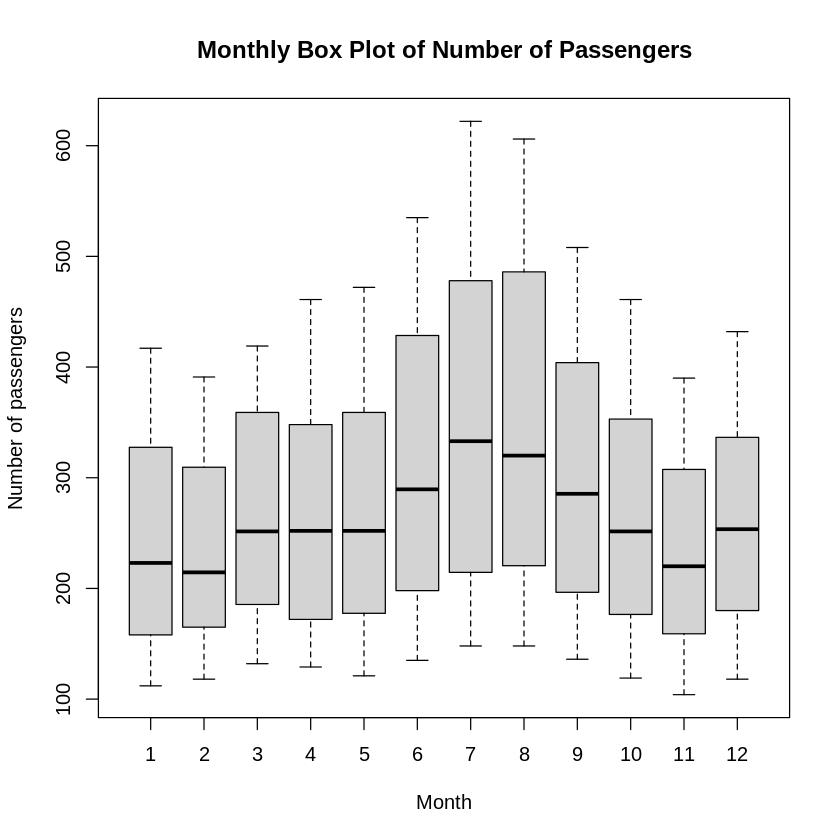

In [41]:
boxplot(AirPassengers~cycle(AirPassengers),
                            xlab = "Month",
                            ylab= "Number of passengers",
                            main = "Monthly Box Plot of Number of Passengers")

```boxplot()``` in R creates box-and-whisker plots which summarize the distribution of a numeric variable using five-number summary and outliers:
* **Box** represent the inter-quartile range (IQR) from the 1st quartile to the 3rd quartile.
* **Median line** is a horizontal line inside the box = 50th percentile (Q2).
* **Whiskers** extend to the most extreme data point that is in interval $[Q3 + 1.5·IQR, Q1 - 1.5·IQR]$
* **Outliers**, individual points beyond the whiskers, are plotted as separate points.

Looking at the boxplot we can see that data is **seasonal** with peak in July and the trough in February and Novembar.

## Time Series Patterns

There are three main **time series patterns**:
* **Trend**: A trend exists when there is a long-term increase or decrease in the data. (In AirPassengers data number of passengers is increasing.)
* **Seasonal**: A seasonal paptern occurs when a tie series is affected by seasonal factors such as the day of the week or the time of the day. Seosonaity refers to a known frequency. (AirPassengers data is seasonal with monthly frequency.)
* **Cyclic**: A cycle occurs when the data shows rises and falls that are not of a fixed frequency. (AirPassengers data doen't have cyclic.)

## ```fpp3``` package



```fpp3``` is meta-package that loads several core libreraries for modern time series analysis in R, most importantly:


*   ```tsibble```: The fundamental data structure (Time Series Tibble)
*   ```fable```: For forcasting models (ETS, ARIMA, etc.)
*   ```feasts```: For feature extraction and statistics
*   ```ggplot2```: For visualization (via ```autoplot```)
*   ``dplyr```: For data manipulation



In [1]:
install.packages("fpp3")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘progressr’, ‘ggdist’, ‘numDeriv’, ‘warp’, ‘BH’, ‘fabletools’, ‘distributional’, ‘slider’, ‘anytime’, ‘fable’, ‘feasts’, ‘tsibble’, ‘tsibbledata’




In [2]:
library(fpp3)

Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ──────────────────────────────────────────── fpp3 1.0.2 ──

✔ tibble      3.3.0     ✔ tsibble     1.1.6
✔ dplyr       1.1.4     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.1     ✔ feasts      0.4.2
✔ lubridate   1.9.4     ✔ fable       0.4.1
✔ ggplot2     4.0.1     

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



### ```tsibble``` Object Structure

```tsibble``` (Time Series Tibble) is data structure that has 3 types of columns:
*   **Index**: The time variable
*   **Key**: One or more variables that uniquely identify each series
*  **Measurements**: The actual data values (features/targets)

*Example*

We have a dataset tracking daily temperature for 3 different cities Paris, London and Belgrade.

* Index is Date
* Key is City
* Measurement is Temperature

In [ ]:
# Define the input data (tibble)
daily_data <- tibble(
  Date = rep(seq(ymd("2025-01-01"), ymd("2025-01-05"), by = "day"), 3),
  City = rep(c("Paris", "London", "Belgrade"), each = 5),
  Temperature = c(3.1, 4.5, 3, 4.33, 5, 4, 4.7, 4.5, 4.2, 5, 3.5, 5, 5.1, 4, 4.3)
)

In [ ]:
# Convert data into tsibble object
daily_tsibble <- daily_data |>
  as_tsibble(index = Date, key = City)

In [ ]:
daily_tsibble

Date,City,Temperature
<date>,<chr>,<dbl>
2025-01-01,Belgrade,3.50
2025-01-02,Belgrade,5.00
2025-01-03,Belgrade,5.10
2025-01-04,Belgrade,4.00
2025-01-05,Belgrade,4.30
2025-01-01,London,4.00
2025-01-02,London,4.70
2025-01-03,London,4.50
2025-01-04,London,4.20


In R:

*   ```<-``` is the standard assignment operator
*   ```c()``` concatenates multiple values into a vector
*   ```|>``` takes the result on the left and pass it as the first argument to the function on the right



### Visualization using ```autoplot()```

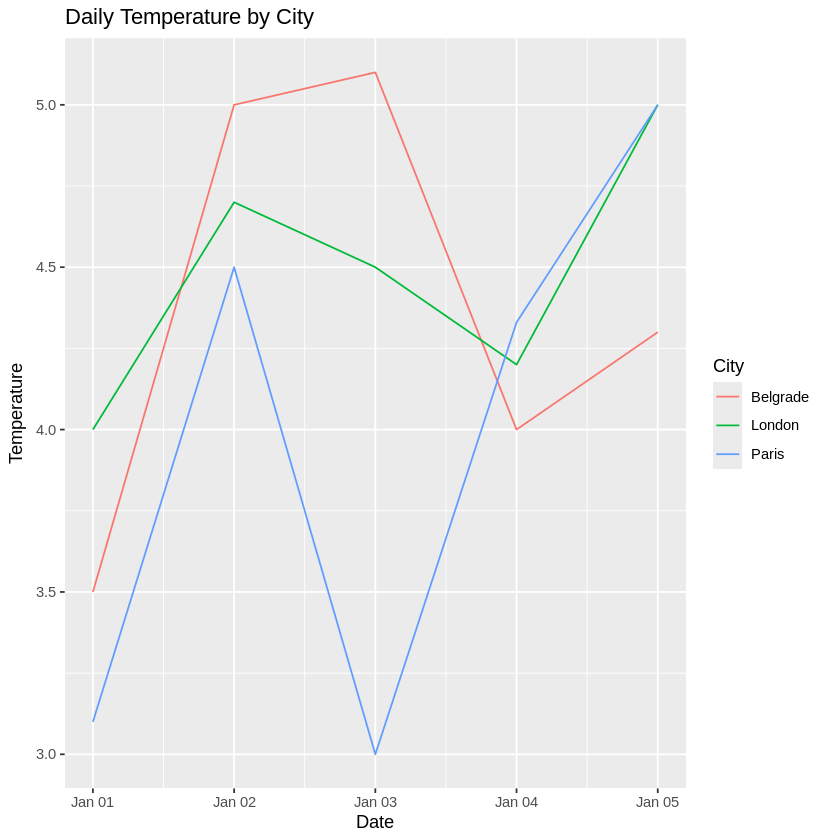

In [ ]:
daily_tsibble |>
  autoplot(Temperature) +
  labs(title = "Daily Temperature by City", x = "Date", y = "Temperature")

### Filter data using ```dplyr```

In [ ]:
daily_tsibble |>
  filter(City == "London") -> london_daily_tsible

In [ ]:
london_daily_tsible

Date,City,Temperature
<date>,<chr>,<dbl>
2025-01-01,London,4.0
2025-01-02,London,4.7
2025-01-03,London,4.5
2025-01-04,London,4.2
2025-01-05,London,5.0


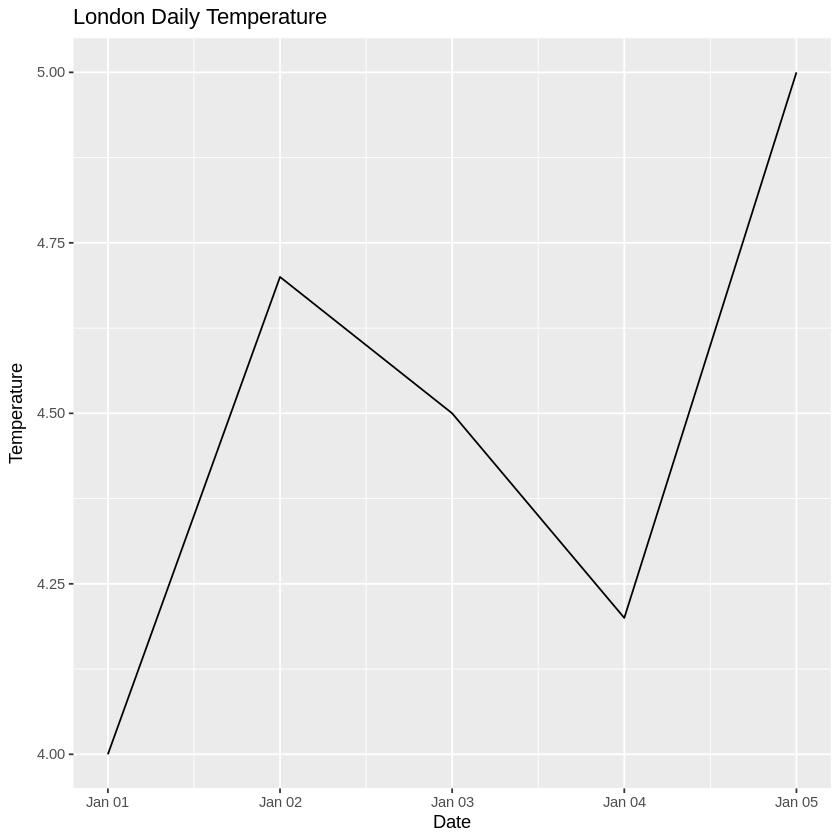

In [ ]:
london_daily_tsible |>
  autoplot(Temperature) +
  labs(title = "London Daily Temperature", x = "Date", y = "Temperature")

## More complex example #1

PBS is publicly available dataset in R describing monthly medicare prescription data in Australia.

It contains the following values:

*   **Scripts** — the total number of scripts (i.e. prescriptions)
*   **Cost** — cost of the scripts (in AUD — Australian dollars)

The data is disaggregated using four keys:
* **Concession**:	Concessional scripts are given to pensioners, unemployed, dependents, and other card holders
Type:	Co-payments are made until an individual's script expenditure hits a threshold (\$290.00 for concession, \$1141.80 otherwise). Safety net subsidies are provided to individuals exceeding this amount.
* **ATC1**:	Anatomical Therapeutic Chemical index (level 1)
* **ATC2**:	Anatomical Therapeutic Chemical index (level 2)

[Documentation on PBS dataset](https://rdrr.io/cran/tsibbledata/man/PBS.html)

In [ ]:
head(PBS)

Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
<mth>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1991 Jul,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877
1991 Aug,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011
1991 Sep,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020
1991 Oct,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222
1991 Nov,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120
1991 Dec,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15028,54299


We are interested only in medications for diabetes. For those medications ATC2 = A10.

In [ ]:
# filter() keeps only the rows that satisfy a condition
PBS |>
  filter(ATC2 == "A10") -> a10

In [ ]:
head(a10)

Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
<mth>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1991 Jul,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,89733,2092878
1991 Aug,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,77101,1795733
1991 Sep,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,76255,1777231
1991 Oct,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,78681,1848507
1991 Nov,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,70554,1686458
1991 Dec,Concessional,Co-payments,A,Alimentary tract and metabolism,A10,ANTIDIABETIC THERAPY,75814,1843079


In [ ]:
  # select() keeps only specified columns
  a10 |>
    select(Month, Concession, Type, Cost) -> a10_reduced

In [ ]:
head(a10_reduced)

Month,Concession,Type,Cost
<mth>,<chr>,<chr>,<dbl>
1991 Jul,Concessional,Co-payments,2092878
1991 Aug,Concessional,Co-payments,1795733
1991 Sep,Concessional,Co-payments,1777231
1991 Oct,Concessional,Co-payments,1848507
1991 Nov,Concessional,Co-payments,1686458
1991 Dec,Concessional,Co-payments,1843079


In [ ]:
a10_reduced |>
  summarise(TotalC = sum(Cost) / 1e6) -> a10_summarised

In [ ]:
head(a10_summarised)

Month,TotalC
<mth>,<dbl>
1991 Jul,3.526591
1991 Aug,3.180891
1991 Sep,3.252221
1991 Oct,3.611003
1991 Nov,3.565869
1991 Dec,4.306371


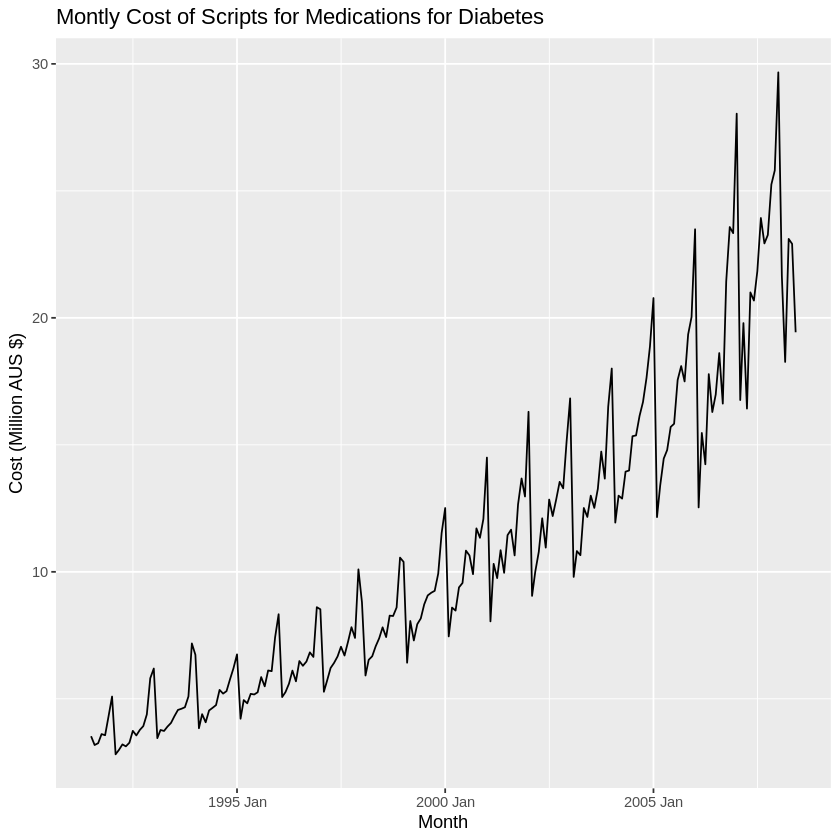

In [ ]:
a10_summarised |>
  autoplot(TotalC) +
  labs(x = "Month", y = "Cost (Million AUS $)", title = "Montly Cost of Scripts for Medications for Diabetes")

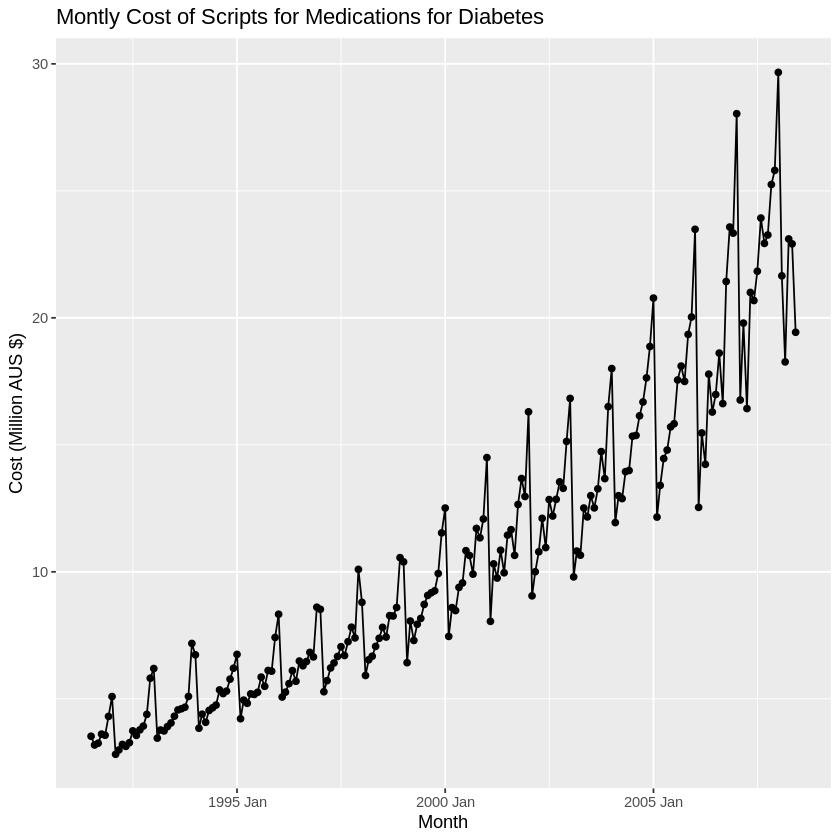

In [ ]:
a10_summarised |>
  autoplot(TotalC) +
  geom_point() +
  labs(x = "Month", y = "Cost (Million AUS $)", title = "Montly Cost of Scripts for Medications for Diabetes")

In the plot above we se:
* **Seasonality** - spikes (peaks and troughs) are happening at a regular basis.
* Increasing and non-linear **trend**.
* the difference between the peack and the trough at the end is much larger then the difference at the biginning. We call this **multiplicative effect**.

### Sesonal plots

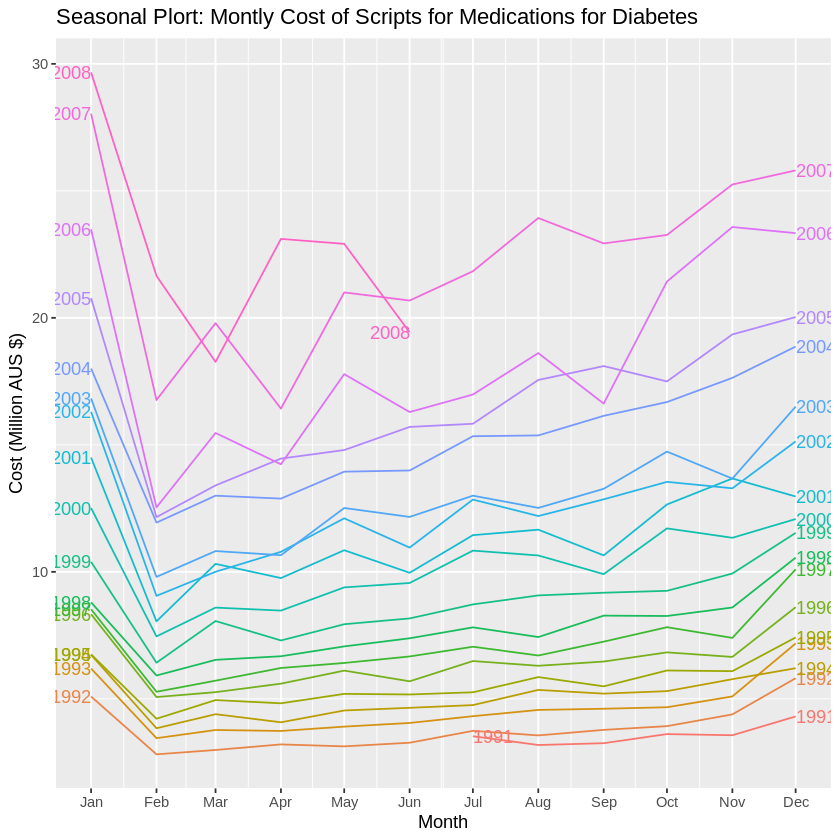

In [ ]:
a10_summarised |>
  gg_season(TotalC, labels = "both") +
  labs(y = "Cost (Million AUS $)", title = "Seasonal Plort: Montly Cost of Scripts for Medications for Diabetes")

We can observe the following patterns:
* There is a **spike in January**
* There is a **drop in February**
* There is **increase between February and March** because the difference in days in those months
* There is **increasing trend** in the data

## More complex example #2

```Ansett``` dataset contains multiple time series of total weekly air passenger numbers on Ansett airline flights between Melbourne and Sydney, 1987–1992.

Air traffic numbers are in thousands, and divided into first class, business class and economy class.

There was a major pilots' industrial dispute during the data period resulting in some weeks with zero traffic. There was also at least two changes in the definitions of passenger classes.

[Documentation of the dataset](https://search.r-project.org/CRAN/refmans/fpp/html/melsyd.html)

In [ ]:
head(ansett)

### EDA

In a ```tsibble``` the functions that return the index and keys are:
* ```index_var()```
* ```key_vars()```

In [ ]:
index_var(ansett)

In [ ]:
key_vars(ansett)

There are two keys in anset dataset, "Airports" and "Class".

The functions that return all distinct values in a single column are:
* ```distinct()```: returns a tibble object
* ```unique()```: returns a vector

In [ ]:
ansett |> distinct(Class)

In [ ]:
unique(ansett$Class) # Operator $ extracts a column

In [ ]:
unique(ansett$Airports)

### Different plots

There are 3 different values in "Class" column and 10 in "Airports" column. That means the dataset consists of
$$ 3 \cdot 10 = 30 $$
time series.

When we try to plot all of them, the plot is messy.

In [ ]:
ansett |>
  autoplot(Passengers)

Because of that we filter by "Class" column and plot number of passangers in economy class in all 10 routes.

In [ ]:
ansett |>
  filter(Class == "Economy") -> ansett_economy

In [ ]:
head(ansett_economy)

In [ ]:
ansett_economy |>
  autoplot(Passengers) +
  labs(x = "Week", y = "# Passangers", title = "Weekly number of passangers in economy class")

Now, we can filter by Airports and look at only Melburn-Sydney route.

In [ ]:
ansett |>
  filter(Airports == "MEL-SYD") -> ansett_mel_syd

In [ ]:
ansett_mel_syd |>
  autoplot(Passengers) +
  labs(x = "Week", y = "# Passangers", title = "Weekly number of passangers in Mel-Syd route")

There are two externally caused features in the data:

* Dip in the late '80s was caused by pilots strike, so there was no flights.

* Higher number of passangers in bussiness class and lower number of passangers in economy clss in 1992. was caused by airline substituting economy for business class.


Now, let's look only at the number of passangers in economy class for a specific route "MEL-SYD".

In [ ]:
ansett_economy_mel_syd <-
  ansett_economy |>
    filter(Airports == "MEL-SYD")

In [ ]:
ansett_economy_mel_syd |>
  autoplot(Passengers) +
  labs(x = "Week", y = "# Passangers", title = "Weekly number of passangers in Mel-Syd route in economy class")

Features that plot reveals are:

* **Dips** at the end of a year are caused by Christmas. There are no flights happening during the Christmas.
* **Spikes** are caused by sport events happening in Australia.

# Recources:
* [Time Series Analysis wih R](https://s-ai-f.github.io/Time-Series/time-series-basics.html)
* Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018. [Online tutorial on Time plots](https://otexts.com/fpp3/time-plots.html#time-plots)